In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from mlxtend.plotting.decision_regions import plot_decision_regions
from sklearn.svm import SVC 
from sklearn.datasets import make_classification

In [2]:
def constraint(mu, y):
    return np.sum(mu * y)

In [3]:
def dual(mu, X, y):
    s = np.sum(mu[:, None] * y[:, None] * X, axis=0)
    return (np.sum(mu) - 0.5 * (np.sum(s * s)))

In [4]:
class SVM:
    def __init__(self, lr=0.1, n=10000):
        self._n_iter = n
        self._lr = lr
        self._weights = None
        self._intercept = None

    def fit(self, X, y):
        y = np.array([-1, 1])[y]

        mu = np.zeros(len(y))

        grad_dual = grad(dual)
        grad_c = grad(constraint)
        
        epsilon = 0.000001
        for i in range(self._n_iter):
            grad_dual_at_mu_X_y = grad_dual(mu, X, y)
            grad_c_at_mu_y = grad_c(mu, y)
            normalized_grad_c_at_mu_y = grad_c_at_mu_y / (np.linalg.norm(grad_c_at_mu_y) + epsilon)
            
            d = grad_dual_at_mu_X_y - (np.matmul(grad_dual_at_mu_X_y, normalized_grad_c_at_mu_y)) * normalized_grad_c_at_mu_y
            mu_next = mu + self._lr * d

            for i in range(len(mu)):
                if mu_next[i] > 0:
                    mu[i] = mu_next[i]           

        self._weights = np.sum(mu[:, None] * y[:, None] * X, axis=0)
        self._intercept = 1 - np.min(np.matmul(X, self._weights)[y == 1])

    def predict(self, X):
        return (np.matmul(X, self._weights) + self._intercept) > 0


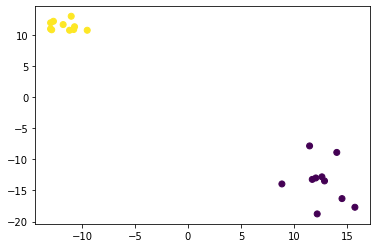

In [5]:
X, y = make_classification(class_sep=3, scale = 4, n_classes=2, n_clusters_per_class=1, n_features=2, 
                           n_informative=2, n_samples=20, n_redundant = 0, random_state = 7)
plt.scatter(X[:, 0], X[:, 1], c=y);

w:  [-0.06382921  0.04415503]
b:  -0.08123887629041948


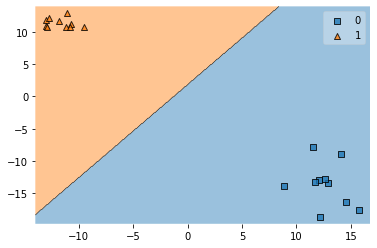

In [6]:
our_svm = SVM(lr=0.0001, n=1000)
our_svm.fit(X, y)
plot_decision_regions(X, y, our_svm)
print("w: ", our_svm._weights) 
print("b: ", our_svm._intercept)

w:  [[-0.05342079  0.04728   ]]
b:  [0.01578686]


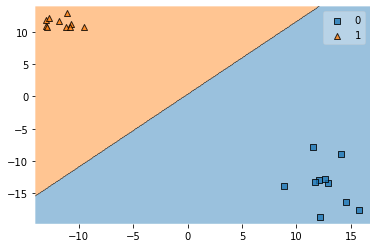

In [7]:
sklearn_svm = SVC(kernel="linear", max_iter=1000)
sklearn_svm.fit(X, y)
plot_decision_regions(X, y, sklearn_svm)
print("w: ", sklearn_svm._get_coef())
print("b: ", sklearn_svm._intercept_)